In [1]:
import pandas as pd
import numpy as np
# Use raw string notation by adding an 'r' before the file path
data = pd.read_csv(r"C:\Users\MYBOOK\Downloads\existing-commercial-wireless-telecommunication-services-facilities-in-san-francisco-1 (3).csv")

# Inspect first few rows and columns
print(data.head())
print(data.info())

  Carrier       ID  Search Ring Name ID Block      Lot Zoning District  \
0    AT&T  CCL00001       Marshall Hale  1017      028            RM-2   
1    AT&T  CCL00002         Embarcadero  0237  014/016           C-3-O   
2    AT&T  CCL00005   Mercy High School  7231      003         RH-1(D)   
3    AT&T  CCL00006      Bernal Heights  3637      069  MISSION STREET   
4    AT&T  CCL00049      Marina Safeway  0503      030            RC-3   

  Hight and Bulk District Type of Building Preference (1-7)  \
0                    80-E       Commercial                7   
1                   350-S       Commercial              NaN   
2                    40-X           Public                1   
3               40-X/65-B       Commercial                6   
4               65-A/40-X       Commercial                4   

  Type of Consumer Services  ... Number of Antennas Location of BTS  \
0       voice, video & data  ...                  9        Basement   
1       voice, video & data  ...  

In [17]:
print(data.tail())

     Carrier        ID  Search Ring Name ID   Block  Lot Zoning District  \
1248  Sprint  SF25XC654         Mission Bay    3821    2              M2   
1249  Sprint  SF36XC056     Presidio Tunnel  Public  ROW           C-3-O   
1250  Sprint  SF60XC312    Ocean Beach Apts    1691   19            NC-S   
1251  Sprint  FS04XB013      Noe Valley DAS     ROW  ROW           C-3-O   
1252  Sprint  SF25XC340       Presidio Relo     ROW  ROW           C-3-O   

     Hight and Bulk District Type of Building Preference (1-7)  \
1248                    40-X       Industrial                3   
1249                    40-X           Public                1   
1250                    40-X       Commercial                4   
1251                    40-X       Commercial                1   
1252                    40-X       Commercial                1   

       Type of Consumer Services  ... Number of Antennas Location of BTS  \
1248  Voice & Data Transmissions  ...                  3            Ro

In [20]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Carrier                            1253 non-null   object 
 1   ID                                 1253 non-null   object 
 2   Search Ring Name ID                1253 non-null   object 
 3   Block                              1253 non-null   object 
 4   Lot                                1253 non-null   object 
 5   Zoning District                    1253 non-null   object 
 6   Hight and Bulk District            1253 non-null   object 
 7   Type of Building                   1253 non-null   object 
 8   Preference (1-7)                   1253 non-null   object 
 9   Type of Consumer Services          1253 non-null   object 
 10  Type of Consumer Products          1253 non-null   object 
 11  Number of Antennas                 1253 non-null   objec

In [19]:
data.describe

<bound method NDFrame.describe of      Carrier        ID  Search Ring Name ID   Block      Lot Zoning District  \
0       AT&T   CCL00001       Marshall Hale    1017      028            RM-2   
1       AT&T   CCL00002         Embarcadero    0237  014/016           C-3-O   
2       AT&T   CCL00005   Mercy High School    7231      003         RH-1(D)   
3       AT&T   CCL00006      Bernal Heights    3637      069  MISSION STREET   
4       AT&T   CCL00049      Marina Safeway    0503      030            RC-3   
...      ...        ...                 ...     ...      ...             ...   
1248  Sprint  SF25XC654         Mission Bay    3821        2              M2   
1249  Sprint  SF36XC056     Presidio Tunnel  Public      ROW           C-3-O   
1250  Sprint  SF60XC312    Ocean Beach Apts    1691       19            NC-S   
1251  Sprint  FS04XB013      Noe Valley DAS     ROW      ROW           C-3-O   
1252  Sprint  SF25XC340       Presidio Relo     ROW      ROW           C-3-O   

     

In [21]:
data.size 

26313

## DATAPROCESSING

In [2]:
# Check for missing values
missing_values = data.isnull().sum()

# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(exclude=['number']).columns

# Fill missing values in numeric columns with mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing values in categorical columns with mode
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Check for missing values after filling
missing_values_after = data.isnull().sum()
print(missing_values_after)


Carrier                              0
ID                                   0
Search Ring Name ID                  0
Block                                0
Lot                                  0
Zoning District                      0
Hight and Bulk District              0
Type of Building                     0
Preference (1-7)                     0
Type of Consumer Services            0
Type of Consumer Products            0
Number of Antennas                   0
Location of BTS                      0
Type of Technology                   0
Radio Frequency Range (Megahertz)    0
Power Output of Equipment (Watts)    0
Height to Top of Antenna             0
Name of Community Liason             0
Phone Number of Community Liason     0
Comments                             0
Location 1                           0
dtype: int64


In [22]:
data.duplicated().sum() 

0

## Outliers

In [3]:
# Select only the numeric columns for outlier detection
numeric_data = data.select_dtypes(include=[np.number])

# Detect and remove outliers
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers
numeric_data_clean = numeric_data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Merge back the non-numeric data
non_numeric_data = data.select_dtypes(exclude=[np.number])
data_clean = pd.concat([numeric_data_clean, non_numeric_data], axis=1)
print(data_clean.head())

  Carrier       ID  Search Ring Name ID Block      Lot Zoning District  \
0    AT&T  CCL00001       Marshall Hale  1017      028            RM-2   
1    AT&T  CCL00002         Embarcadero  0237  014/016           C-3-O   
2    AT&T  CCL00005   Mercy High School  7231      003         RH-1(D)   
3    AT&T  CCL00006      Bernal Heights  3637      069  MISSION STREET   
4    AT&T  CCL00049      Marina Safeway  0503      030            RC-3   

  Hight and Bulk District Type of Building Preference (1-7)  \
0                    80-E       Commercial                7   
1                   350-S       Commercial                1   
2                    40-X           Public                1   
3               40-X/65-B       Commercial                6   
4               65-A/40-X       Commercial                4   

  Type of Consumer Services  ... Number of Antennas Location of BTS  \
0       voice, video & data  ...                  9        Basement   
1       voice, video & data  ...  

In [16]:
print(data.columns)

Index(['Carrier', 'ID ', 'Search Ring Name ID', 'Block', 'Lot',
       'Zoning District', 'Hight and Bulk District', 'Type of Building',
       'Preference (1-7)', 'Type of Consumer Services',
       'Type of Consumer Products', 'Number of Antennas', 'Location of BTS',
       'Type of Technology', 'Radio Frequency Range (Megahertz)',
       'Power Output of Equipment (Watts)', 'Height to Top of Antenna',
       'Name of Community Liason', 'Phone Number of Community Liason',
       'Comments', 'Location 1'],
      dtype='object')


## 4. Exploratory Data Analysis (EDA)

In [5]:
# Display column names
print(data_encoded.columns)


Index(['Carrier_AT&T', 'Carrier_Clearwire', 'Carrier_Sprint',
       'Carrier_T-Mobile', 'Carrier_Verizon Wireless', 'ID _119143',
       'ID _123218', 'ID _123236', 'ID _123237', 'ID _123240',
       ...
       'Location 1_(37.807972, -122.4109722)',
       'Location 1_(37.808031, -122.415869)',
       'Location 1_(37.808058, -122.41601)', 'Location 1_(37.8081, -122.4115)',
       'Location 1_(37.808176, -122.410931)',
       'Location 1_(37.808194, -122.412489)',
       'Location 1_(37.808361, -122.41211)',
       'Location 1_(37.8092, -122.367833)',
       'Location 1_(37.82549, -122.374236)',
       'Location 1_(37.825627, -122.37397)'],
      dtype='object', length=5285)


In [6]:
# Convert 'Power Output of Equipment (Watts)' column to numeric, forcing invalid parsing to NaN
data['Power Output of Equipment (Watts)'] = pd.to_numeric(data['Power Output of Equipment (Watts)'], errors='coerce')

# Check for NaN values after conversion and handle them (e.g., filling with mean or dropping)
data['Power Output of Equipment (Watts)'].fillna(data['Power Output of Equipment (Watts)'].mean(), inplace=True)

# Apply log transformation to the now numeric column
data['Power Output of Equipment (Watts)'] = np.log1p(data['Power Output of Equipment (Watts)'])

# Inspect the transformed data
print(data['Power Output of Equipment (Watts)'].head())
import numpy as np


# Apply log transformation to skewed data
data['Power Output of Equipment (Watts)'] = np.log1p(data['Power Output of Equipment (Watts)'])


0    9.720226
1    9.720226
2    9.720226
3    9.720226
4    8.879472
Name: Power Output of Equipment (Watts), dtype: float64


C:\Users\MYBOOK\AppData\Local\Temp\ipykernel_10696\1845441359.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Power Output of Equipment (Watts)'].fillna(data['Power Output of Equipment (Watts)'].mean(), inplace=True)


### 1 Histogram of Target Variable

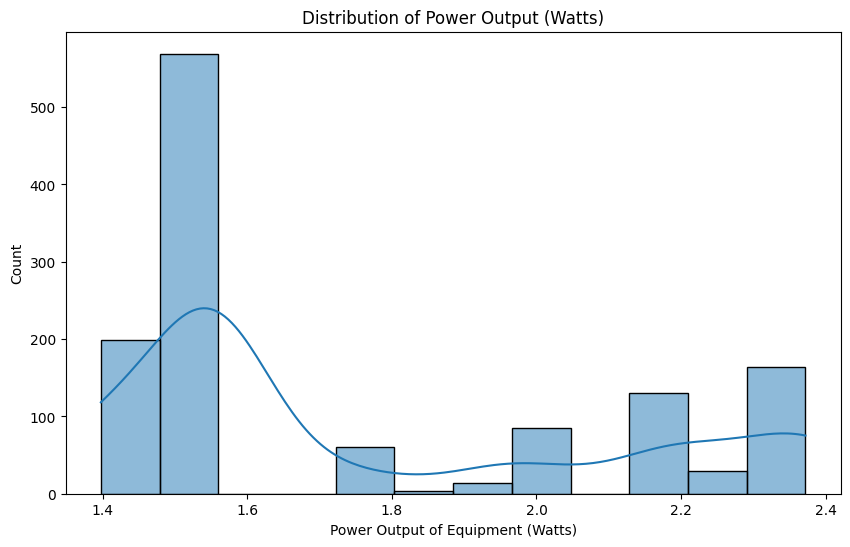

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data['Power Output of Equipment (Watts)'], kde=True)
plt.title('Distribution of Power Output (Watts)')
plt.show()


### 2 Boxplot to Detect Outliers

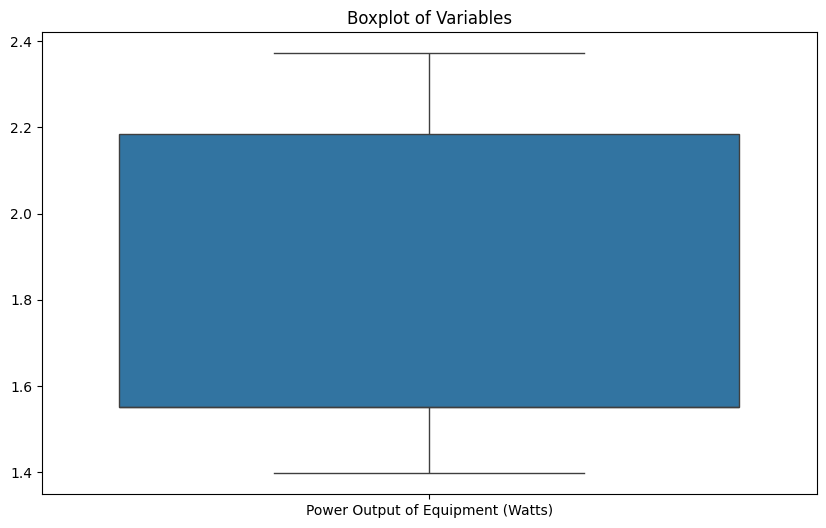

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.title('Boxplot of Variables')
plt.show()


### 3 Pair Plot for Relationships Between Variables

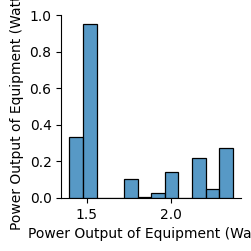

In [9]:
sns.pairplot(data)
plt.show()


### 4 Correlation Heatmap

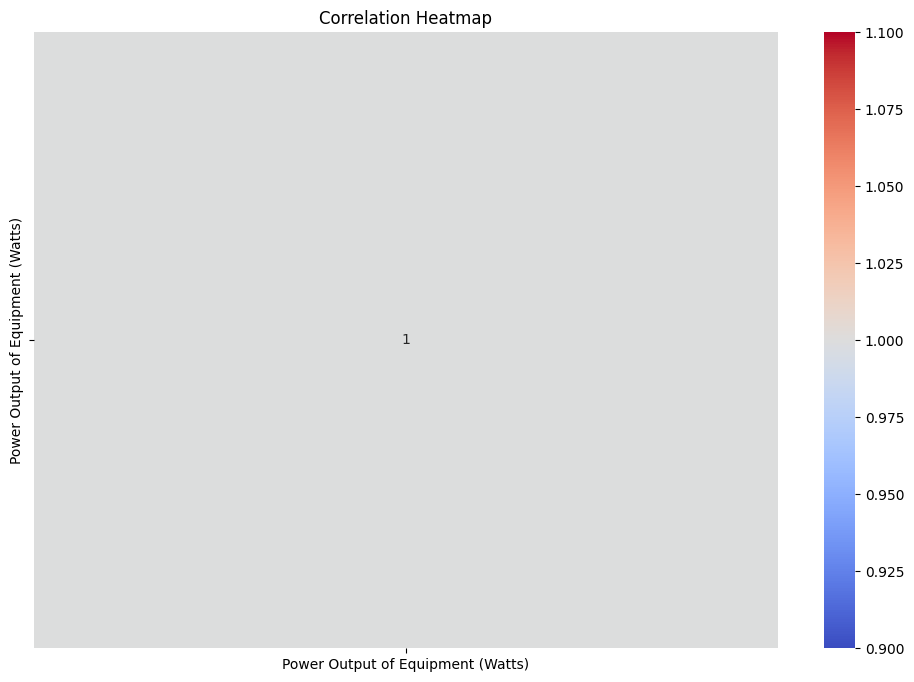

In [10]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Generate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 5 KDE Plot for Target Variable

C:\Users\MYBOOK\AppData\Local\Temp\ipykernel_3524\4185171027.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Power Output of Equipment (Watts)'], shade=True)


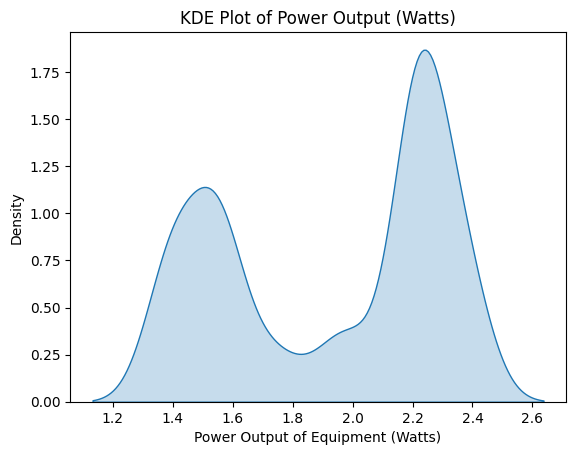

In [45]:
sns.kdeplot(data['Power Output of Equipment (Watts)'], shade=True)
plt.title('KDE Plot of Power Output (Watts)')
plt.show()


### .6 Line Plot of Feature vs Target

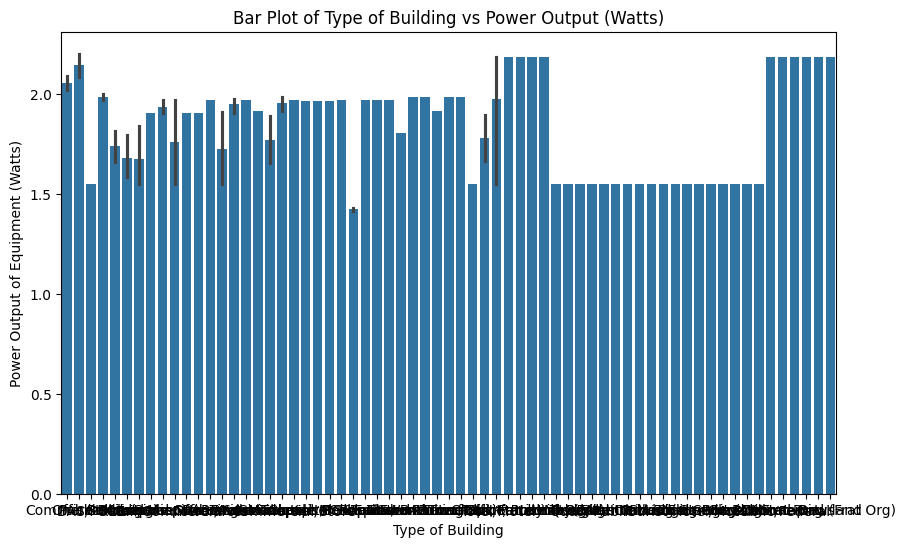

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Type of Building', y='Power Output of Equipment (Watts)', data=data)
plt.title('Bar Plot of Type of Building vs Power Output (Watts)')
plt.show()


## 6. Feature Engineering

In [25]:
# One-hot encoding for categorical variables
data = pd.get_dummies(data, drop_first=True)


## 7. Feature Selection

### We can use Random Forest or correlation analysis to select important features.

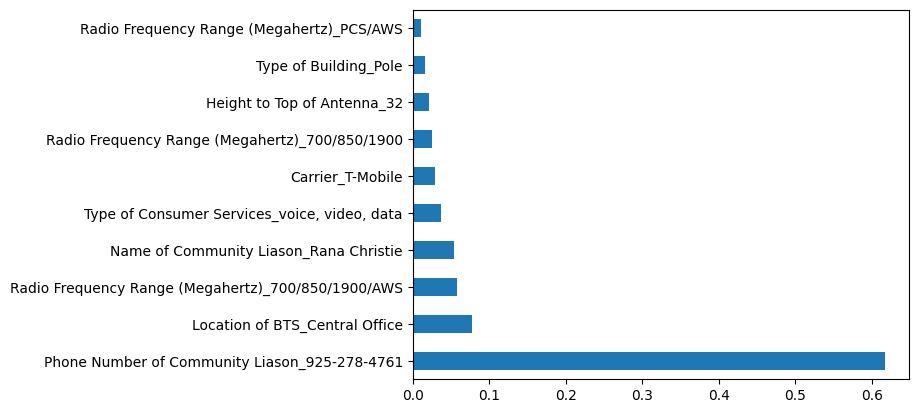

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Select K Best using RandomForest
X = data.drop('Power Output of Equipment (Watts)', axis=1)
y = data['Power Output of Equipment (Watts)']

rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.show()


## 8. Train-Test Split

### Split the data into training and testing sets. 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 9. Feature Scaling

 ### Scale numerical features to ensure they are on the same magnitude.

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 10. Build and Train Regression Models
We will implement 5 different regression algorithms:

1 Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

2 Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()

3 Gradient Boosting Regressor

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)


GradientBoostingRegressor()

4 SVR (Support Vector Regressor)

In [39]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)


SVR()

5 MLP Regressor

In [40]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()
mlp.fit(X_train, y_train)


MLPRegressor()

## 11. Model Evaluation
Use regression metrics like MAE, MSE, RMSE, and R² to evaluate the model's performance.

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred = lr.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}')


MAE: 0.11981460480827935, MSE: 0.02120853950019877, RMSE: 0.1456315195972313, R2: 0.8224831091730995


## 12. Hyperparameter Tuning
we can tune hyperparameters using GridSearchCV or RandomizedSearchCV.

## Hyperparameter Tuning using GridSearchCV:

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Predict using the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

## Hyperparameter Tuning using RandomizedSearchCV:

In [ ]:
# Define the hyperparameter grid for random search
random_grid = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5),
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, n_jobs=-1, verbose=2)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best parameters: {random_search.best_params_}")

# Predict using the best model
best_rf_random = random_search.best_estimator_
y_pred_random = best_rf_random.predict(X_test)